In [1]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install Tensorflow

In [2]:
# import dependencies
from path import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans

In [3]:
file_path = "mushrooms_combined_df_clean.csv"
mushroom_xgboost_df = pd.read_csv(file_path, index_col='Unnamed: 0')


In [4]:
mushroom_xgboost_df.head()

,Poisonous or Edible,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-attachment,gill-spacing,Gill-size,Gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk color below ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,f,n,f,n,f,w,b,n,...,f,w,w,p,w,o,e,k,a,g
2,e,x,s,w,f,n,f,w,b,n,...,f,w,w,p,w,o,e,k,s,g
3,e,x,f,g,f,n,f,w,b,k,...,f,w,w,p,w,o,e,k,s,g
4,e,f,f,w,f,n,f,w,b,k,...,f,w,w,p,w,o,e,n,a,g


In [5]:
mushroom_xgboost_df.info

<bound method DataFrame.info of      Poisonous or Edible Cap-Shape Cap-Surface Cap-Color Bruises Odor  \
0                      p         x           s         n       t    p   
1                      e         x           f         n       f    n   
2                      e         x           s         w       f    n   
3                      e         x           f         g       f    n   
4                      e         f           f         w       f    n   
...                  ...       ...         ...       ...     ...  ...   
8119                   e         f           s         n       f    n   
8120                   e         b           y         n       f    n   
8121                   e         x           y         n       f    n   
8122                   p         x           y         c       f    m   
8123                   p         f           y         c       f    m   

     Gill-attachment gill-spacing Gill-size Gill-color  ...  \
0                  f        

In [6]:
# setup data for OneHotEncoder

# Generate our categorical variable lists
app_cat = mushroom_xgboost_df.dtypes[mushroom_xgboost_df.dtypes == "object"].index.tolist()
mushroom_xgboost_df[app_cat].nunique()

Poisonous or Edible         2
Cap-Shape                   6
Cap-Surface                 4
Cap-Color                   8
Bruises                     2
Odor                        7
Gill-attachment             2
gill-spacing                2
Gill-size                   2
Gill-color                  9
stalk-shape                 2
stalk-root                  4
stalk-surface-above-ring    4
stalk-surface-below-ring    4
stalk-color-above-ring      7
stalk color below ring      7
veil-type                   1
veil-color                  2
ring-number                 3
ring-type                   4
spore-print-color           6
population                  6
habitat                     6
dtype: int64

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encoded_mushroom_xgboost_df = pd.DataFrame(enc.fit_transform(mushroom_xgboost_df[app_cat]))

# Add the encoded variable names to the dataframe
encoded_mushroom_xgboost_df.columns = enc.get_feature_names(app_cat)
encoded_mushroom_xgboost_df.head()

,Poisonous or Edible_e,Poisonous or Edible_p,Cap-Shape_b,Cap-Shape_c,Cap-Shape_f,Cap-Shape_k,Cap-Shape_s,Cap-Shape_x,Cap-Surface_f,Cap-Surface_g,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
# Merge one-hot encoded features and drop the originals
mushroom_xgboost_df = mushroom_xgboost_df.merge(encoded_mushroom_xgboost_df,left_index=True, right_index=True)
mushroom_xgboost_df = mushroom_xgboost_df.drop(app_cat, axis=1)
mushroom_xgboost_df.head()

,Poisonous or Edible_e,Poisonous or Edible_p,Cap-Shape_b,Cap-Shape_c,Cap-Shape_f,Cap-Shape_k,Cap-Shape_s,Cap-Shape_x,Cap-Surface_f,Cap-Surface_g,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
mushroom_df=mushroom_xgboost_df.dropna()
mushroom_df.head()


,Poisonous or Edible_e,Poisonous or Edible_p,Cap-Shape_b,Cap-Shape_c,Cap-Shape_f,Cap-Shape_k,Cap-Shape_s,Cap-Shape_x,Cap-Surface_f,Cap-Surface_g,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
X = mushroom_df.iloc[:,2:].values
y = mushroom_df.iloc[:,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.3694565e-05 0.0000000e+00 0.0000000e+00 2.0367459e-04 3.1866883e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.8214345e-04
 0.0000000e+00 8.2533661e-04 0.0000000e+00 2.3826070e-02 0.0000000e+00
 3.2375701e-02 0.0000000e+00 7.3173612e-02 2.9686036e-02 5.5795941e-03
 2.6457989e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.2273361e-04
 0.0000000e+00 6.0240868e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 5.2863482e-04 0.0000000e+00 8.5673248e-03 0.0000000e+00 1.8265011e-04
 1.4090282e-01 0.0000000e+00 2.0999765e-01 0.0000000e+00 1.6784046e-03
 3.0727108e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.0248852e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.9880854e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 8.1115980e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

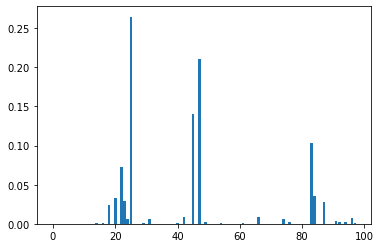

In [24]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [25]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [33]:
print(model.feature_importances_)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.3694565e-05 0.0000000e+00 0.0000000e+00 2.0367459e-04 3.1866883e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.8214345e-04
 0.0000000e+00 8.2533661e-04 0.0000000e+00 2.3826070e-02 0.0000000e+00
 3.2375701e-02 0.0000000e+00 7.3173612e-02 2.9686036e-02 5.5795941e-03
 2.6457989e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.2273361e-04
 0.0000000e+00 6.0240868e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 5.2863482e-04 0.0000000e+00 8.5673248e-03 0.0000000e+00 1.8265011e-04
 1.4090282e-01 0.0000000e+00 2.0999765e-01 0.0000000e+00 1.6784046e-03
 3.0727108e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.0248852e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.9880854e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 8.1115980e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [11]:
X.shape

y.shape


(4588,)